# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Muhannad\AppData\Local\Temp\ipykernel_13296\845136906.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Constants

In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-feature.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test_target.txt'

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
print('Shape: ', X_test.shape)
print('Size: ', X_test.size)

Shape:  (5737, 2500)
Size:  14342500


## Set the prior

In [6]:
PROB_SPAM = 0.3116

In [7]:
np.log(prob_token_spam)

array([ -4.40752484,  -5.25359965,  -4.99000208, ..., -12.09414618,
       -11.400999  , -10.01470463])

## Joint probability in log format

In [8]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [9]:
joint_log_spam[:5]

array([-1.16603496, -1.16603496, -1.16603496, -1.16603496, -1.16603496])

In [10]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [11]:
joint_log_ham[:5]

array([-0.37338521, -0.37338521, -0.37338521, -0.37338521, -0.37338521])

In [12]:
joint_log_ham.size

5737

# Making Predictions

### Checking for the higher probability

In [13]:
prediction = joint_log_spam > joint_log_ham

In [14]:
prediction[:5]

array([False, False, False, False, False])

In [15]:
y_test[:5]

array([0., 0., 0., 0., 0.])

### Simplify

In [16]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [17]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly: ', correct_docs)

Docs classified correctly:  5148


In [18]:
num_docs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly: ', num_docs_wrong)

Docs classified incorrectly:  589


In [19]:
# Accuarcy
correct_docs/len(X_test)

0.8973331009238278

In [20]:
fraction_wrong = num_docs_wrong/len(X_test)
print('Fraction classified incorrectly: {:.2%}'.format(fraction_wrong))
print('Accuarcy of the model is: {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly: 10.27%
Accuarcy of the model is: 89.73%


## Visualizing the Results

In [21]:
# Chart sytling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

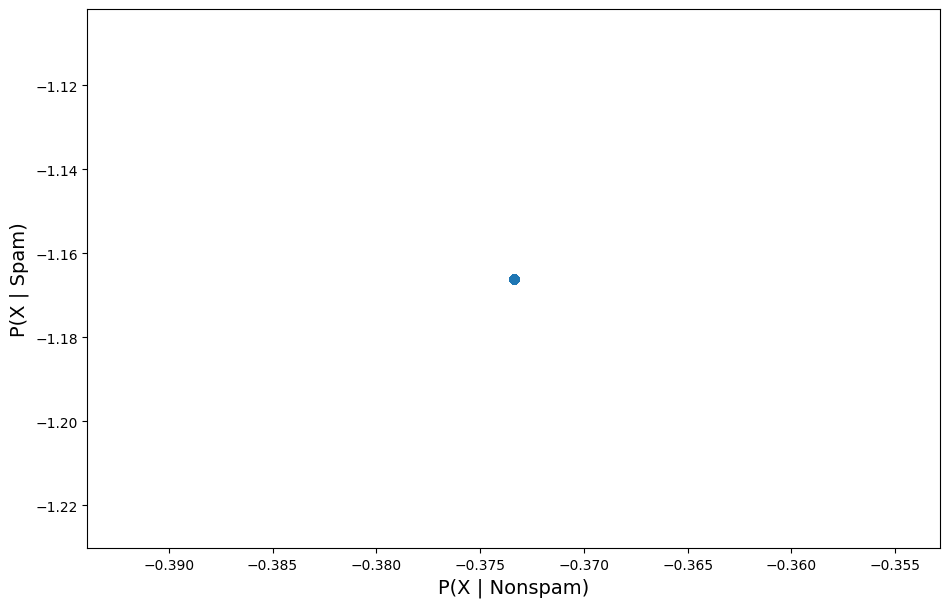

In [22]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.scatter(joint_log_ham, joint_log_spam)
# plt.xlim([-14000, 1])
# plt.ylim([-14000, 1])
plt.show()